In [1]:
#allows any changes on external files to be loaded on code run.
%load_ext autoreload
%autoreload 2

PLOT SLICES
d (200, 6)
d (200, 6)
d (200, 6)
d (200, 6)
d (200, 6)
d (200, 6)


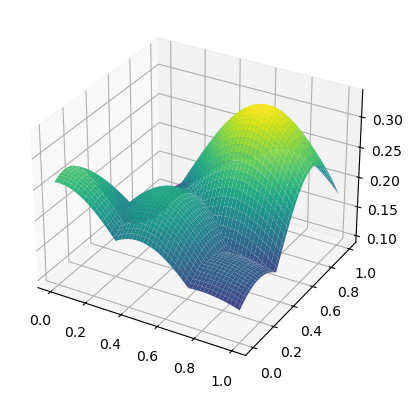

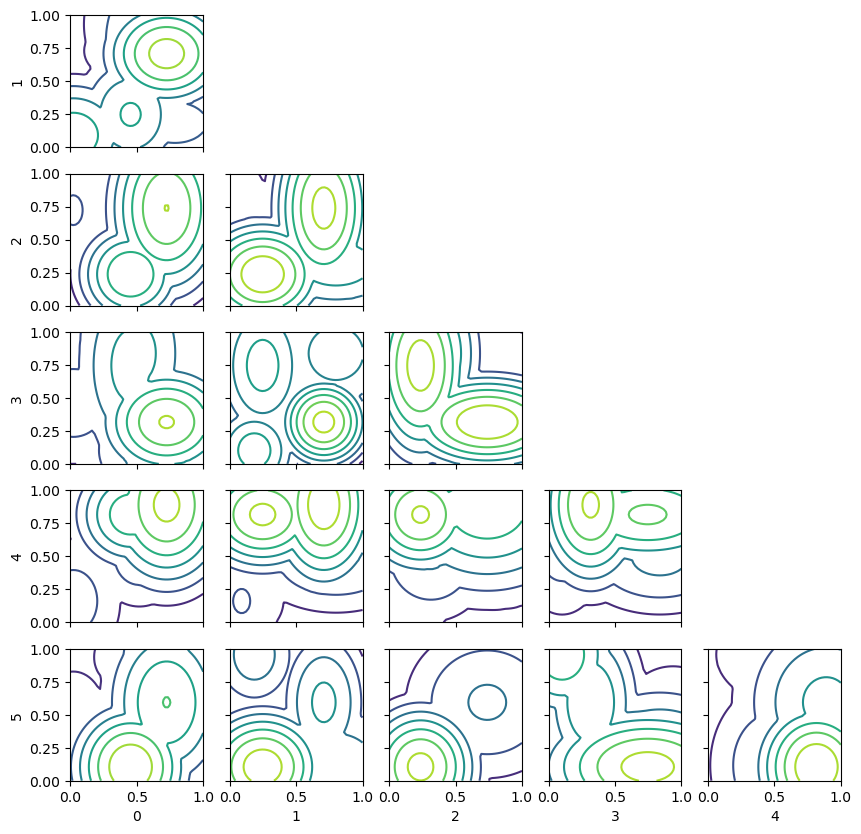

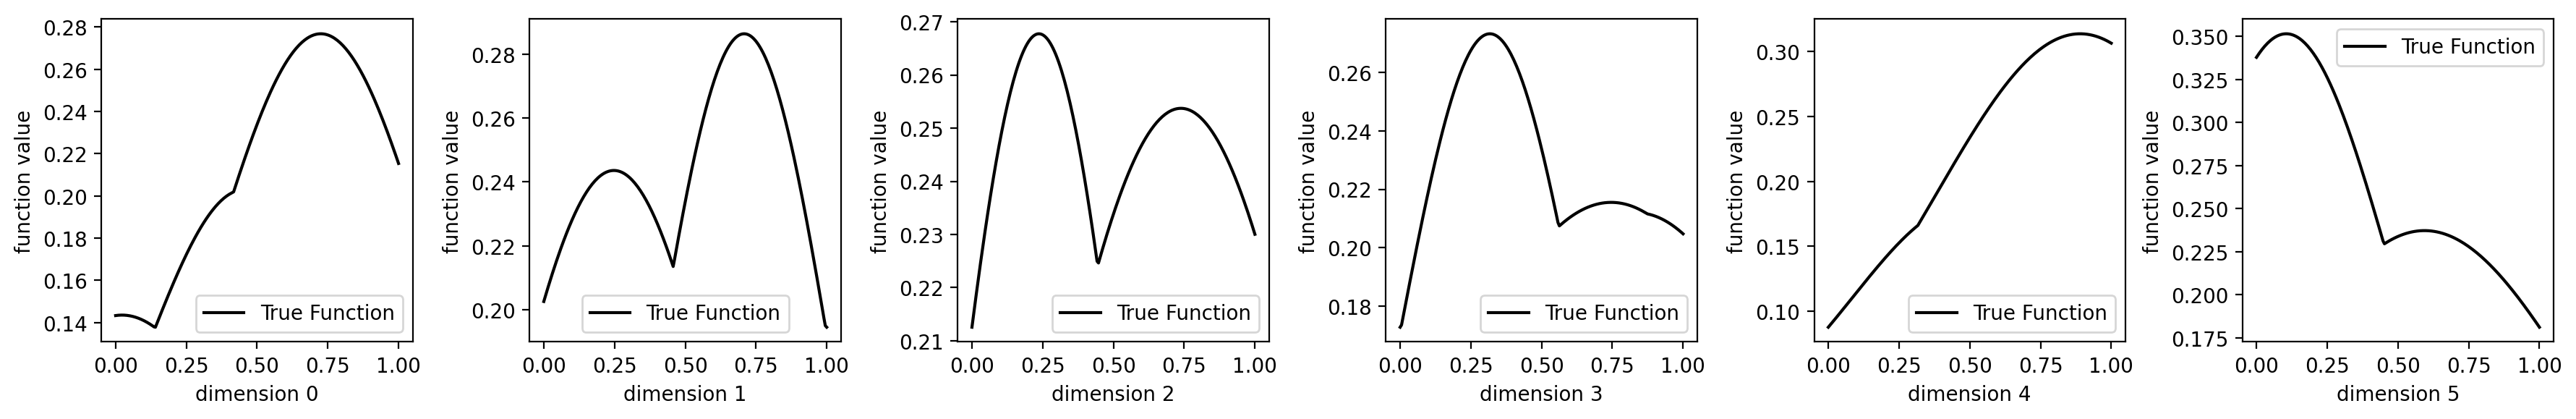

In [3]:
import sys
import matplotlib.pyplot as plt
import os
#sys.path.append(os.path.join(os.curdir,'..'))
from GENE_ML.gene_ml.test_functions.max_of_many_gaussians import MaxOfManyGaussians

num_dim = 6
confine = 0#only needed to forse the mean to be samples in a smaller space than the functions bounds
mean_bounds = [(0+confine,1-confine) for i in range(num_dim)]
bounds = [(0,1) for i in range(num_dim)]
std_bounds=(0.1,0.5)
# std_bounds=(0.008,0.01)

num_gaussians = 20
mmg = MaxOfManyGaussians(num_dim, num_gaussians, bounds, mean_bounds, std_bounds, seed=42)
mmg.plot_2D_of_many(which2=(0,1))#you can try changing which two. It specifies which dimensions to plot
mmg.plot_matrix_contour()
mmg.plot_slices()


In [11]:
import numpy as np
# point evaluation example
X = np.array([[0.2, 0.1, 0.4, 0.5, 0.1],[0.9, 0.4, 0.2, 0.8, 0.4]])

mmg.evaluate(X)

mmg.evaluate(np.array([0.0,0.5, 0.5, 0.5, 0.5]))

0.1497786976894219

# The hope is that the integral function is smooth

For the mixing length surrogate model we only need the mixing length integral to be accurate since this is what does into the quasilinear model. So to check if this integral function is smooth I use the mmg as a test function and integrate over one of the dimensions for each point places in the other dimensions.

# Result, smoother
The integral function is deffinetly smoother but not as smooth as I was hoping. The dimensionally adaptive sparse grids may still struggle. 

PLOT SLICES
d (200, 6)
DEBUG [0.  0.5 0.5 0.5 0.5 0.5]
DEBUG [0.00502513 0.5        0.5        0.5        0.5        0.5       ]
DEBUG [0.01005025 0.5        0.5        0.5        0.5        0.5       ]
DEBUG [0.01507538 0.5        0.5        0.5        0.5        0.5       ]
DEBUG [0.0201005 0.5       0.5       0.5       0.5       0.5      ]
DEBUG [0.02512563 0.5        0.5        0.5        0.5        0.5       ]
DEBUG [0.03015075 0.5        0.5        0.5        0.5        0.5       ]
DEBUG [0.03517588 0.5        0.5        0.5        0.5        0.5       ]
DEBUG [0.04020101 0.5        0.5        0.5        0.5        0.5       ]
DEBUG [0.04522613 0.5        0.5        0.5        0.5        0.5       ]
DEBUG [0.05025126 0.5        0.5        0.5        0.5        0.5       ]
DEBUG [0.05527638 0.5        0.5        0.5        0.5        0.5       ]
DEBUG [0.06030151 0.5        0.5        0.5        0.5        0.5       ]
DEBUG [0.06532663 0.5        0.5        0.5        0.5        0

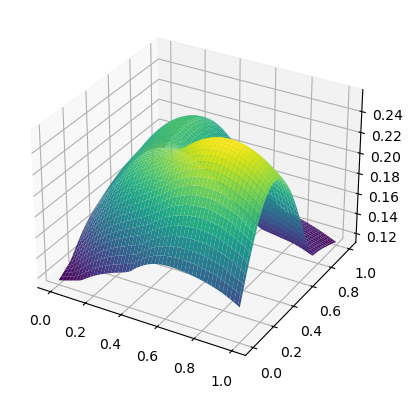

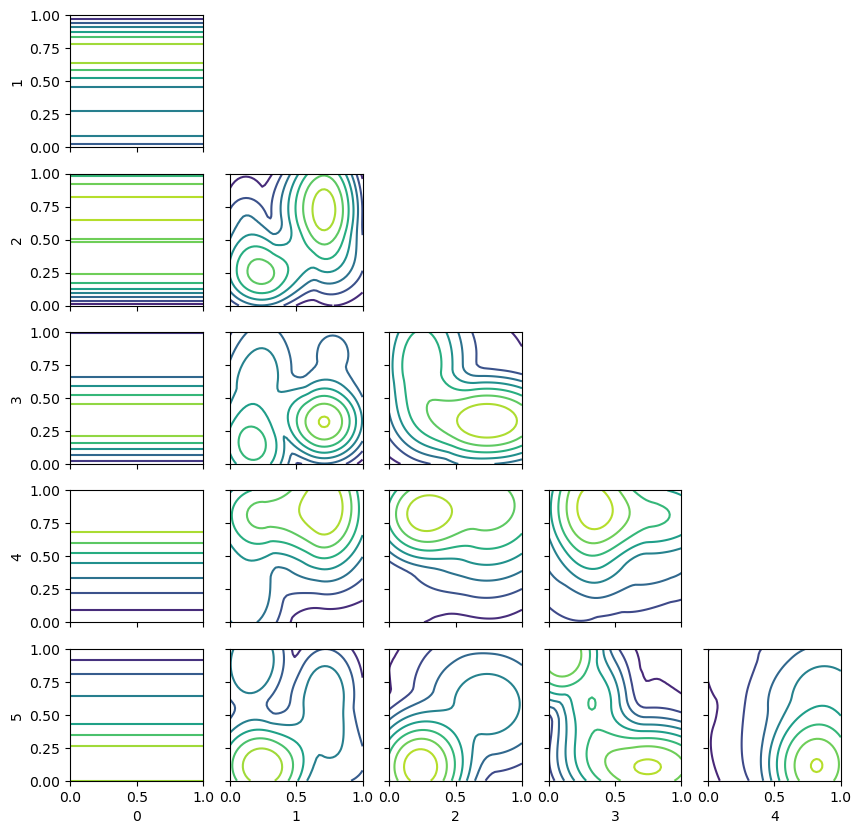

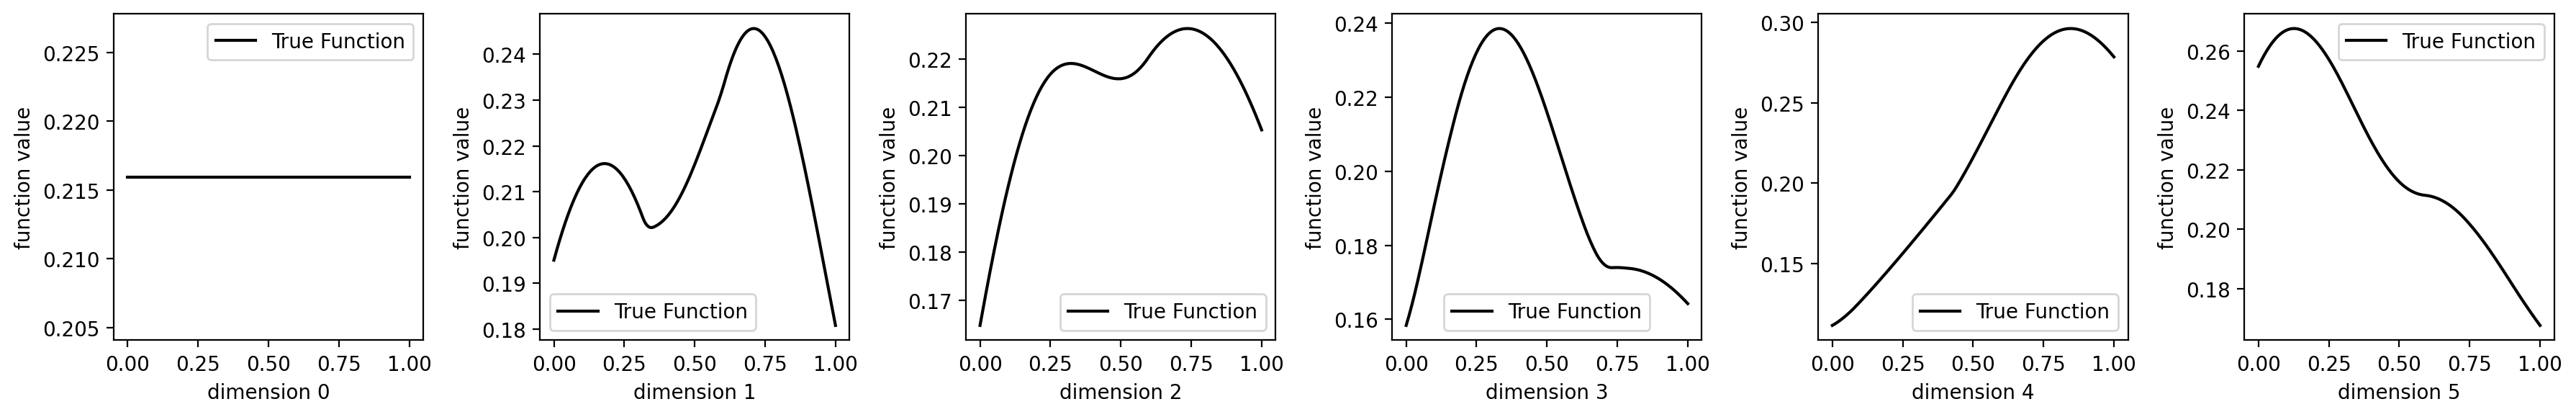

In [5]:
import numpy as np
from scipy.integrate import trapezoid
import matplotlib.pyplot as plt

def integral_fun(x, grid_size=200):
    # Take the first dimension as the one we integrate over
    if len(x) == num_dim:
        None
        x_plus_1D = x
    else:
        x_plus_1D = np.hstack([np.zeros(1),x])
    grid_size=200
    p = np.stack([x_plus_1D for i in range(grid_size)])
    x = np.linspace(0,1, grid_size)
    p[:,0] = x
    # print('DEBUG',p.shape, type(p), p)
    slice=mmg.evaluate(p)
    return trapezoid(slice, x)

non_int_dimension = np.linspace(0,1,100)

# integral_fun(x=np.array([0.5,0.5,0.5,0.5]))    



# integral = [integral_fun(x=np.array([xi,0.05,0.6,0.99])) for xi in non_int_dimension]

# plt.plot(non_int_dimension, integral)

integral_obj = MaxOfManyGaussians(num_dim, num_gaussians, bounds, mean_bounds, std_bounds, seed=42)

integral_obj.evaluate = integral_fun
integral_obj.plot_2D_of_many(which2=(2,3))#you can try changing which two. It specifies which dimensions to plot
integral_obj.plot_matrix_contour()
integral_obj.plot_slices(not_vectorised=True)

# nominals = np.array([0.5,0.5,0.5,0.5,0.5])
# grid_size=200
# p = np.stack([nominals for i in range(grid_size)])
# x = np.linspace(0,1, grid_size)
# p[:,0] = x

# slice=mmg.evaluate(p)

# plt.plot(x,slice)

# print(trapezoid(slice, x))


